<a href="https://colab.research.google.com/github/lefdez/Exploratory-data-analysis-and-models/blob/main/Exploratory_Data_Analysis_and_Logistic_Regression_of_Titanic_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regresión logística

## Una pequeña introducción a lo que es la regresión logística

La regresión logística es una técnica de análisis utilizada para predecir el valor de una variable categórica, es decir, una variable que puede asumir un conjunto limitado de categorías, en función de variables independientes. Este método es especialmente útil para estimar la probabilidad de que un evento ocurra, basándose en diversos factores.

Además, la regresión logística actúa como una herramienta de clasificación. Por ejemplo, puede emplearse para determinar si un correo electrónico es spam o no, evaluar la capacidad de una persona para pagar un préstamo o diagnosticar la presencia o ausencia de una enfermedad específica. Estos casos son ejemplos de clasificaciones binarias, donde el resultado se reduce a dos posibles categorías: "sí" o "no", o simplemente "categoría 1" o "categoría 2".

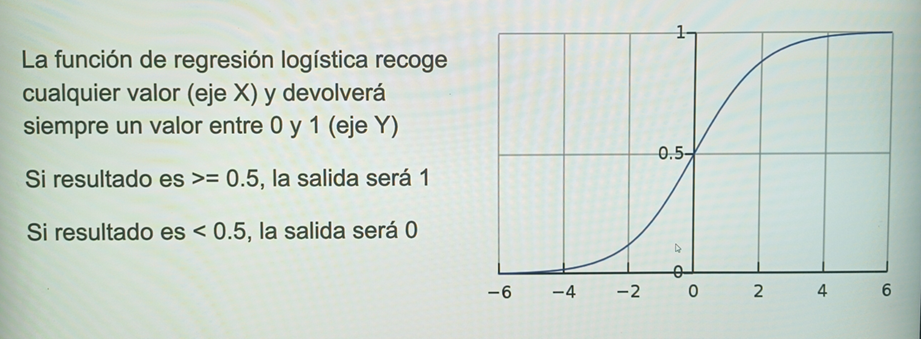

Por lo tanto, si el resultado de la función logística es igual o superior a 0.5, se considerará que la salida es 1; en cambio, si el resultado es menor a 0.5, la salida será 0. Para evaluar el desempeño de nuestro modelo de regresión logística, se utiliza una matriz de confusión.

Este sería un ejemplo de una matriz de confusión.
 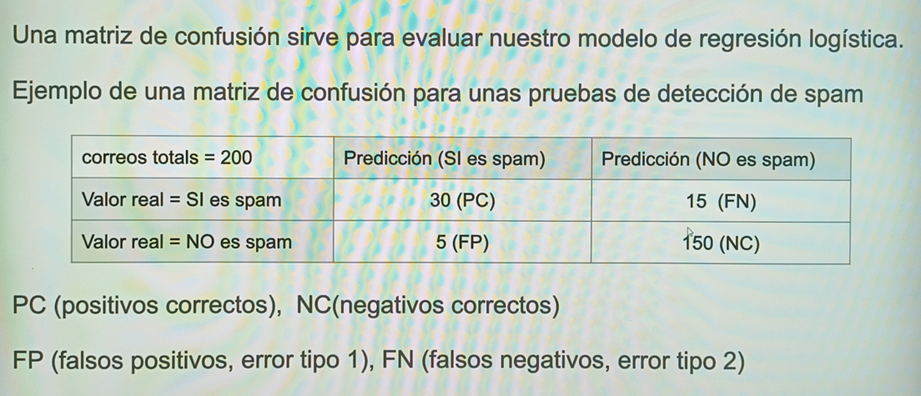

Algunas pruebas de detección de correo electrónico spam el número total de Correos en 200 y tenemos unas columnas de la derecha donde la predicción es que sí es spam y la predicción de que no es un spam en las filas tenemos los valores reales.
La primera fila valor real es que sí es spam y la segunda fila valor real es que no es spam entonces en los cruces de las filas con las columnas tenemos positivos correctos aquellos que predecimos que sí es spam y el valor real es que sí es spam dentro de las pruebas negativos correctos en las que nosotros predecimos en las pruebas de que no es spam y efectivamente no lo es y después tenemos los errores que serían los falsos positivos es decir que si nosotros predecimos que sí es spam pero no lo es con lo cual es un falso positivo un error de tipo 1 y también están los falsos negativos o errores de tipo 2.
Cuando decimos que no es spam pero en realidad sí lo es y ahí tenemos los valores de cada uno de ellos en la tabla.
La precisión sirve para saber la probabilidad de acierto en la predicción es decir cómo calculamos la precisión pues sumamos los positivos correctos más los negativos correctos y esto lo dividimos en total el total de correos de las pruebas.
 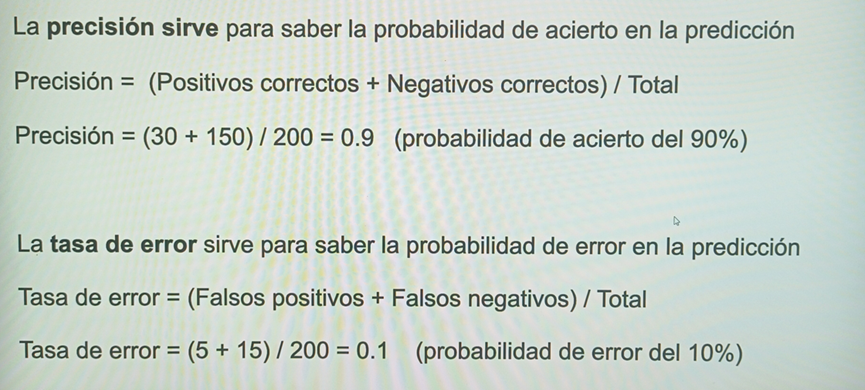

En nuestro caso positivos correctos como vemos en la tabla anterior son 30 30 PC más 150 que serían los negativos correctos en NC dividido entre 200.
Esto nos da un valor de 0.9 con lo cual la probabilidad de acierto de esta función de regresión logística sería del 90 por ciento es decir acertaría en el 90 por ciento de los casos en el correo es spam o no luego vemos que la tasa de error sirve para saber la probabilidad de error en la predicción que sería la contraria a la de cierto tasa de error será igual a los falsos positivos más falsos negativos dividido entre el total en nuestro caso falsos positivos en la tabla anterior sería FP que son 5 más los falsos negativos que son 15 FN con lo cual 5 más 15 dividido entre 200 nos da 0.1 es decir la probabilidad de que la función se equivoque a la hora de identificar un correo como spam es el 10 por ciento.


In [ ]:
!pip install cufflinks

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cufflinks as cf
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [ ]:
train_data = pd.read_csv('sample_data/train.csv')
test_data = pd.read_csv('sample_data/test.csv')

In [ ]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


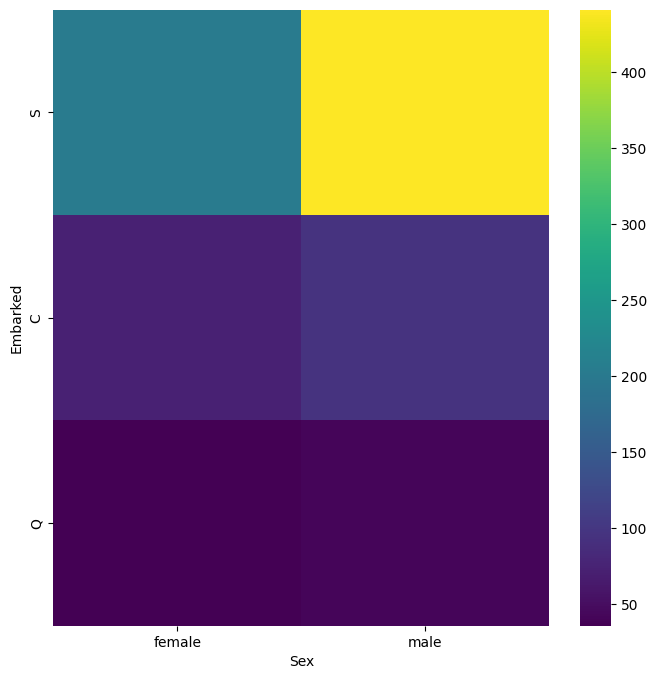

In [ ]:
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Embarked'].value_counts()
    for x_label, grp in train_data.groupby('Sex')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Sex')
_ = plt.ylabel('Embarked')

<Axes: xlabel='Survived', ylabel='count'>

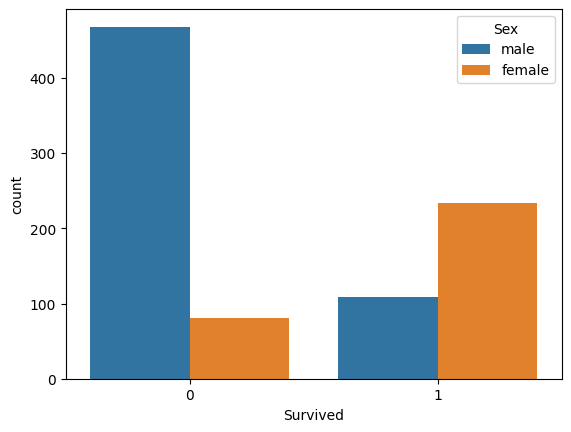

In [ ]:
sns.countplot(x='Survived', hue='Sex', data=train_data)

<Axes: xlabel='Survived', ylabel='count'>

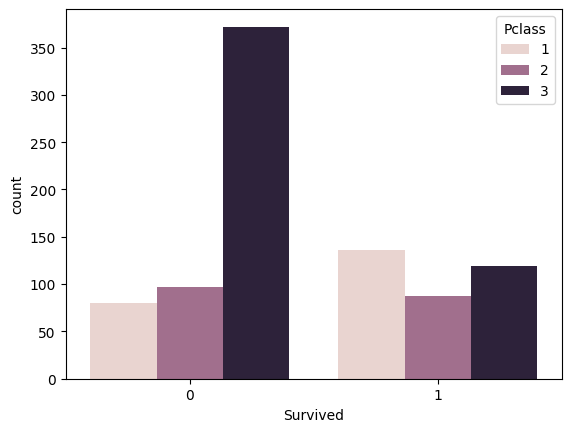

In [ ]:
sns.countplot(x='Survived', data=train_data, hue='Pclass')

In [ ]:
cf.go_offline()

In [ ]:
train_data['Fare'].iplot(kind='hist',bins=40)

<Axes: >

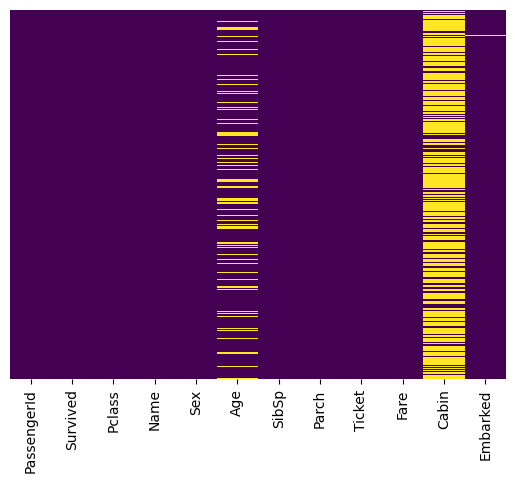

In [ ]:
#Clear data
sns.heatmap(train_data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

<Axes: xlabel='Pclass', ylabel='Age'>

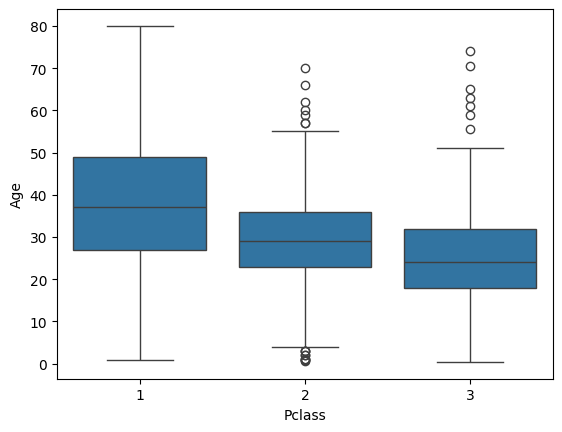

In [ ]:
sns.boxplot(x='Pclass', y='Age', data=train_data)

In [ ]:
def age_impute(data):
    Age , Pclass = data[['Age','Pclass']]
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age


In [ ]:
train_data['Age'] = train_data.apply(age_impute, axis=1)

<Axes: >

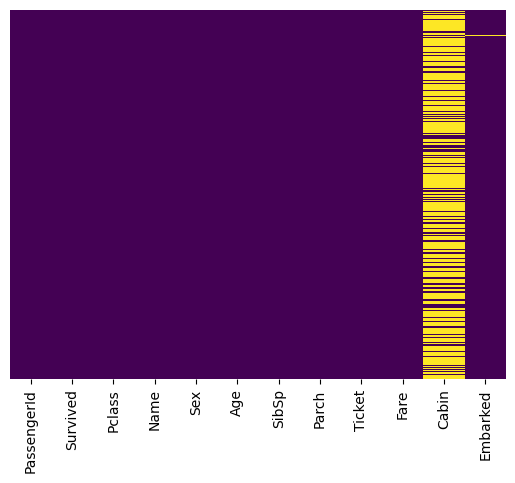

In [ ]:
sns.heatmap(train_data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [ ]:
train_data.drop('Cabin', axis=1, inplace=True)

In [ ]:
train_data.drop(['Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)

In [ ]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [ ]:
sex_male = pd.get_dummies(train_data['Sex'])
sex_male.drop('female', axis=1, inplace=True)
sex_male.head()

,male
0,True
1,False
2,False
3,False
4,True


In [ ]:
train_data = pd.concat([train_data, sex_male], axis=1)

In [ ]:
train_data.drop('Sex', axis=1, inplace=True)

In [ ]:
embarked = pd.get_dummies(train_data['Embarked'], drop_first=True)
embarked.head()

,Q,S
0,False,True
1,False,False
2,False,True
3,False,True
4,False,True


In [ ]:
train_data = pd.concat([train_data, embarked], axis=1)

In [ ]:
train_data.drop('Embarked', axis=1, inplace=True)

In [ ]:
train_data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True


In [ ]:
#Train Model
y_data = train_data['Survived']
X_data = train_data.drop('Survived', axis=1)

#Test data
X_test = test_data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=27)

In [ ]:
X_train

In [ ]:
titanic_model = LogisticRegression()
titanic_model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
predic = titanic_model.predict(X_test)

In [ ]:
print(classification_report(y_test, predic))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       112
           1       0.78      0.73      0.75        67

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.82      0.82      0.82       179



In [ ]:
confusion_matrix(y_test, predic)

array([[98, 14],
       [18, 49]])

<Axes: >

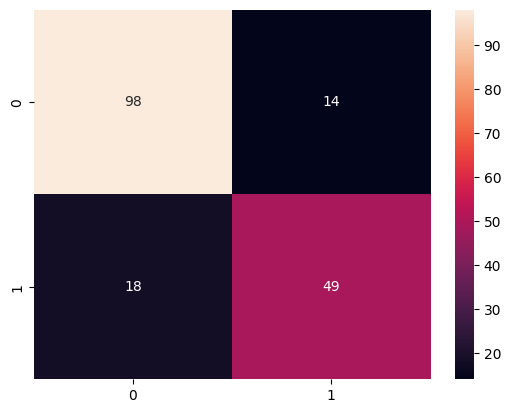

In [ ]:
sns.heatmap(confusion_matrix(y_test, predic), annot=True)

In [ ]:
titanic_final_model = LogisticRegression()
titanic_final_model.fit(X_data, y_data)

LogisticRegression()